In [104]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time  
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from mlflow.models.signature import infer_signature
from sklearn.ensemble import RandomForestClassifier
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
mlflow.end_run()


🏃 View run amusing-worm-392 at: http://127.0.0.1:8080/#/experiments/533037611014912143/runs/64945415e58f451d86487f0e373fd719
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/533037611014912143


In [105]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")

In [107]:

# Sets the current active experiment to the "Apple_Models" experiment and
# returns the Experiment metadata
apple_experiment = mlflow.set_experiment("Rando")

# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "Random_rf_test"
mlflow.set_tag("model_type", "Rando")

# Define an artifact path that the model will be saved to.
artifact_path = "rf_Random"

# Démarrer un nouvel experiment
mlflow.start_run()

# Charger les données
file_path = "/Users/yoavcohen/Desktop/sda_mlops/data/Loan_Data_Preprocessed.csv"
df = pd.read_csv(file_path)

🏃 View run wise-lynx-501 at: http://127.0.0.1:8080/#/experiments/533037611014912143/runs/2615ef402ce24c73a87797f54c72ac5e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/533037611014912143


Exception: Run with UUID 99d9596dd3364e608c9734c4e2285d64 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [108]:
#  Séparer les features et la cible
X = df.drop(columns=['customer_id', 'default'])  # Exclure l'ID client et la cible
y = df['default']

#  Séparation des données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialisation du modèle Random Forest
rf = RandomForestClassifier(random_state=42)



In [109]:
# GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calcul des métriques avec le meilleur modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Log des résultats
mlflow.log_param("best_params", grid_search.best_params_)
mlflow.log_metric("accuracy", accuracy)
mlflow.log_text(report, "classification_report_optimized.txt")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s


KeyboardInterrupt: 

In [115]:

#  Initialisation du modèle Random Forest avec hyperparamètres optimisés
rf = RandomForestClassifier(
    n_estimators=1,     
    max_depth=10,         
    min_samples_split=200,  
    min_samples_leaf=10,    
    max_features= None,   
    random_state=42
)

#  Entraînement du modèle
rf.fit(X_train, y_train)

#  Prédictions sur le jeu d'entraînement
y_train_pred = rf.predict(X_train)

#  Prédictions sur le jeu de test
y_test_pred = rf.predict(X_test)


# Fit the model on the training data
rf.fit(X_train, y_train)

# Calculate error metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}



In [116]:
# Calcul des accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9912563276576162
Test Accuracy: 0.99079754601227


In [117]:
# Validation croisée pour évaluer la performance du modèle
cv_scores = cross_val_score(rf, X, y, cv=5, scoring="accuracy")

# Affichage des résultats
print(f"CV Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")

CV Accuracy: 0.9914101017098474 ± 0.0023276853730704048


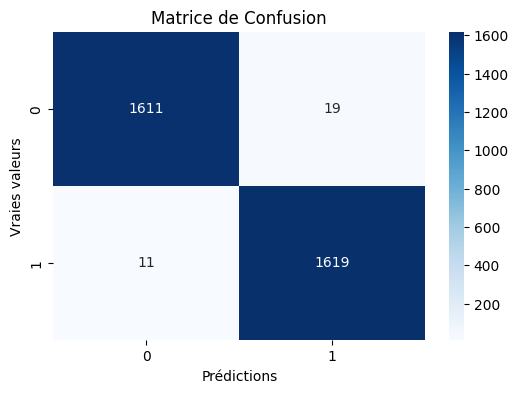

In [118]:

#  Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")

# Sauvegarde de l'image de la matrice de confusion
plt.savefig("confusion_matrix.png")

# Enregistrement de l'image dans MLflow
mlflow.log_artifact("confusion_matrix.png")

# Affichage de la matrice
plt.show()


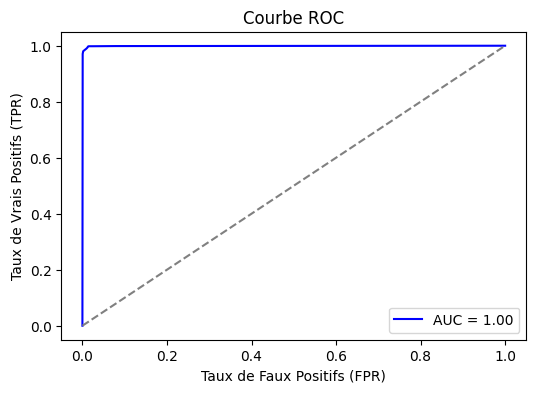

In [119]:
# Prédictions de probabilité pour la classe positive (1)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probabilités pour la classe 1

#  Courbe ROC et AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")

# Sauvegarde de la courbe ROC
plt.savefig("roc_curve.png")
mlflow.log_artifact("roc_curve.png")  # Enregistrement dans MLflow

plt.show()


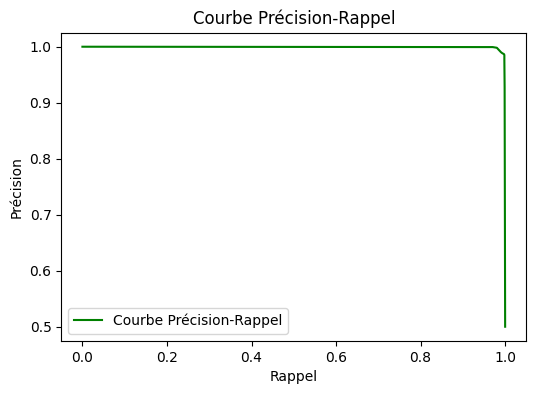

In [120]:
#  Courbe Précision-Rappel
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color="green", label="Courbe Précision-Rappel")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Précision-Rappel")
plt.legend(loc="lower left")

plt.savefig("precision_recall_curve.png")
mlflow.log_artifact("precision_recall_curve.png")  
plt.show()

/var/folders/qx/_5n41q4x6hq45m0tg5ts_0cm0000gn/T/ipykernel_16029/2320220191.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis", hue=None)


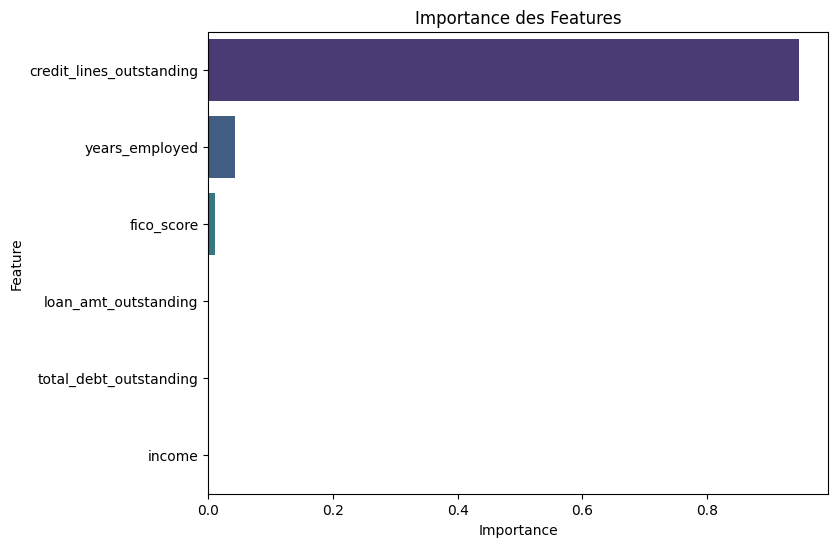

In [121]:
#  Feature Importance
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Affichage du graphique
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis", hue=None)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des Features")

plt.savefig("feature_importances.png")
mlflow.log_artifact("feature_importances.png")
plt.show()


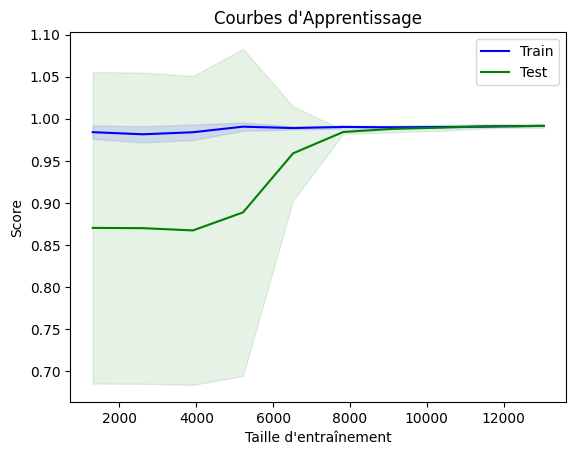

In [122]:
# Obtenir les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcul des moyennes et écarts-types pour l'affichage
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Affichage des courbes
plt.plot(train_sizes, train_scores_mean, label="Train", color='blue')
plt.plot(train_sizes, test_scores_mean, label="Test", color='green')
plt.fill_between(train_sizes, 
                 train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), 
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes, 
                 test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), 
                 alpha=0.1, color='green')

plt.xlabel("Taille d'entraînement")
plt.ylabel("Score")
plt.title("Courbes d'Apprentissage")
plt.legend(loc="best")
plt.show()

In [123]:
#  Sauvegarde des features importantes dans un fichier CSV
feature_importances.to_csv("feature_importances.csv", index=False)
mlflow.log_artifact("feature_importances.csv")

#  Inférer la signature du modèle
input_example = X_test.iloc[:1]
signature = infer_signature(X_test, rf.predict(X_test))

#  Log du modèle avec MLflow
mlflow.sklearn.log_model(rf, "random_forest_model", input_example=input_example, signature=signature)
mlflow.log_metrics(metrics)

#  Fin de l'exécution
mlflow.end_run()

🏃 View run overjoyed-ant-126 at: http://127.0.0.1:8080/#/experiments/533037611014912143/runs/99d9596dd3364e608c9734c4e2285d64
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/533037611014912143


In [124]:
import mlflow
logged_model = 'runs:/99d9596dd3364e608c9734c4e2285d64/random_forest_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(df))

/opt/anaconda3/envs/banking-mlops/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025/03/25 19:11:04 WARNING mlflow.models.utils: Found extra inputs in the model input that are not defined in the model signature: `['default', 'customer_id']`. These inputs will be ignored.


array([0, 1, 0, ..., 1, 1, 1], shape=(16298,))

In [127]:
import mlflow
from pyspark.sql.functions import struct, col

logged_model = 'runs:/99d9596dd3364e608c9734c4e2285d64/random_forest_model'

# Load model as a Spark UDF. Override result_type if the model does not return double values.
loaded_model = mlflow.pyfunc.spark_udf(spark, model_uri=logged_model)

# Predict on a Spark DataFrame.
df.withColumn('predictions', loaded_model(struct(*map(col, df.columns))))

ModuleNotFoundError: No module named 'pyspark'